Try to see how similar the output of the GAN is with respect to the ground truth, to see if the model is overfitted.

In [1]:
import os
import glob

from PIL import Image
# https://pypi.org/project/ImageHash/
import imagehash

In [2]:
def hash_image(img_path: str, method: str = 'average') -> str:
    # implement the hashing methods of choice here
    img = Image.open(img_path)
    if method == 'average':
        hash_ = imagehash.average_hash(img)
    else:
        raise ValueError(f'Unknown method: {method}')
    img.close()
    
    return str(hash_)  # important! return the string version of it

In [3]:
def get_all_punk_files(punks_folder: str, glob_by: str='punk*.png') -> list:
    return glob.glob(os.path.join(punks_folder, glob_by))

In [4]:
def hash_ground_truth(punks_folder: str, method: str = 'average') -> dict:
    ground_truth = {}
    for punk_file in get_all_punk_files(punks_folder):
        h_ = hash_image(punk_file)
        if h_ in ground_truth:
            # print(f'Hash collision! {punk_file} with {ground_truth[h_]}')
            pass
        else:
            ground_truth[h_] = []
        ground_truth[h_].append(punk_file)
    return ground_truth

In [5]:
punks_folder = './punks'
method = 'average'

gt = hash_ground_truth(punks_folder, method)

If the following number is too low then the hashing technique might be too aggressive...

In [6]:
print(f'There are {len(gt)} buckets in the ground truth of '
      f'{len(get_all_punk_files(punks_folder))} punks')

There are 1644 buckets in the ground truth of 10000 punks


In [7]:
# check if hashing actually works
# poor man's unit test here:
punk_1 = os.path.join(punks_folder, 'punk_1.png')

assert punk_1 in gt[hash_image(punk_1)]

## View some ground truth buckets

This will show a different output everytime. In randomly picks a bucket where there is more than one punk.

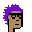

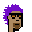

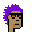

In [13]:
import random

for punk in gt[random.choice(list(key for key in gt.keys()
                                  if len(gt[key]) > 1))]:
    img = Image.open(punk)
    img = img.resize((32, 32))
    display(img)

## Check if the output punks are actually new or belong to one ground truth bucket

In [10]:
output_older = './my_out'  # generate with model/generate_punks.py

n_collisions = 0
n_new = 0
new_punk_files = []

for punk_file in get_all_punk_files(output_older, 'result*png'):
    h_ = hash_image(punk_file)
    if h_ in gt:
        n_collisions += 1
    else:
        n_new += 1
        new_punk_files.append(punk_file)
        
print(f'Number of new punks in output folder: {n_new}, number of collisions: {n_collisions}')

Number of new punks in output folder: 31, number of collisions: 69


## View new punks

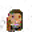

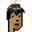

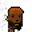

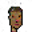

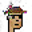

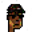

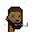

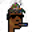

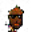

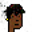

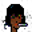

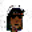

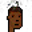

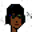

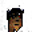

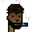

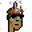

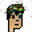

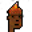

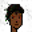

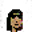

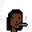

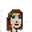

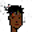

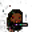

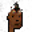

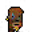

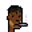

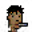

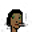

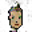

In [11]:
for new_punk in new_punk_files:
    img = Image.open(new_punk)
    img = img.resize((32, 32))
    display(img)